<a href="https://colab.research.google.com/github/Laviniamadeira/TelecomX/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 ETAPA 1 - Importação de bibliotecas


In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

# 📌 ETAPA 2 - Extração de dados


In [145]:
# URL do arquivo JSON com os dados
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Leitura do JSON diretamente da URL
dados = pd.read_json(url)

In [146]:
# Faz a normalização (expande as colunas com dicionários)
dados_normalizados = pd.concat([
    dados.drop(['customer', 'phone', 'internet', 'account'], axis=1),
    pd.json_normalize(dados['customer']),
    pd.json_normalize(dados['phone']),
    pd.json_normalize(dados['internet']),
    pd.json_normalize(dados['account'])
], axis=1)

#salvando em um csv o dados limpos
dados_normalizados.to_csv("dados_limpos.csv", index=False)

In [147]:
# Criando dataframe principal
df = pd.DataFrame(dados_normalizados)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# 📌 ETAPA 3 - Transformação dos dados

In [148]:
# Convertendo colunas Yes e No para 0 e 1
colunas_binarias = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling','Churn','OnlineBackup','Charges.Total']

df[colunas_binarias] = df[colunas_binarias].replace({'Yes': 1, 'No': 0})
df[colunas_binarias] = df[colunas_binarias].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)


/tmp/ipython-input-1163780621.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[colunas_binarias] = df[colunas_binarias].replace({'Yes': 1, 'No': 0})


In [149]:
# Convertendo a coluna 'gender' para 0 e 1
df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1})

/tmp/ipython-input-418299944.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1})


In [150]:
# Conversao do tipo da coluna
df['Charges.Total'] = df['Charges.Total'].replace(' ', np.nan).astype(float)

#🔧 ETAPA 4 - Padronização de nomes de colunas


In [151]:
# Limpando nome das colunas
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('.', '_')
display(df.head())

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.0
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.0
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.0
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.0
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.0


In [152]:
mapeamento_colunas = {
    'customerid': 'id_cliente',
    'churn': 'cancelamento',
    'gender': 'genero',
    'seniorcitizen': 'idoso',
    'partner': 'possui_conjuge',
    'dependents': 'possui_dependentes',
    'tenure': 'meses_como_cliente',
    'phoneservice': 'servico_telefonico',
    'multiplelines': 'multiplas_linhas',
    'internetservice': 'servico_internet',
    'onlinesecurity': 'seguranca_online',
    'onlinebackup': 'backup_online',
    'deviceprotection': 'protecao_dispositivo',
    'techsupport': 'suporte_tecnico',
    'streamingtv': 'tv_streaming',
    'streamingmovies': 'filmes_streaming',
    'contract': 'tipo_contrato',
    'paperlessbilling': 'fatura_online',
    'paymentmethod': 'metodo_pagamento',
    'charges_monthly': 'custo_mensal',
    'charges_total': 'custo_total',
    'contas_diarias': 'custo_diario'
}

df.rename(columns=mapeamento_colunas, inplace=True)

In [153]:
df.head()

,id_cliente,cancelamento,genero,idoso,possui_conjuge,possui_dependentes,meses_como_cliente,servico_telefonico,multiplas_linhas,servico_internet,...,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_online,metodo_pagamento,custo_mensal,custo_total
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.0
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.0
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.0
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.0
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.0


# 📌 ETAPA 6 - Criação de novas métricas



In [154]:
# dados_normalizados['gender'].value_counts()

In [155]:
#Criando uma nova coluna para faturamento mensal
df['contas_diarias'] = df['custo_mensal'] / 30
display(df.head())

,id_cliente,cancelamento,genero,idoso,possui_conjuge,possui_dependentes,meses_como_cliente,servico_telefonico,multiplas_linhas,servico_internet,...,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_online,metodo_pagamento,custo_mensal,custo_total,contas_diarias
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.0,2.186667
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.0,1.996667
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.0,2.463333
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.0,3.266667
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.0,2.796667


# 📌 ETAPA 7 - Salvando CSV final

In [156]:
# Salvando CSV final
df.to_csv("dados_limpos.csv", index=False)
print("Salvei os dados limpos no arquivo 'dados_limpos_alterado.csv'")

Salvei os dados limpos no arquivo 'dados_limpos_alterado.csv'


#📊TAPA 8 - Estatísticas descritivas



In [157]:
print(df.describe())

       cancelamento       genero        idoso  possui_conjuge  \
count   7267.000000  7267.000000  7267.000000     7267.000000   
mean       0.257190     0.505711     0.162653        0.484106   
std        0.437115     0.500002     0.369074        0.499782   
min        0.000000     0.000000     0.000000        0.000000   
25%        0.000000     0.000000     0.000000        0.000000   
50%        0.000000     1.000000     0.000000        0.000000   
75%        1.000000     1.000000     0.000000        1.000000   
max        1.000000     1.000000     1.000000        1.000000   

       possui_dependentes  meses_como_cliente  servico_telefonico  \
count         7267.000000         7267.000000         7267.000000   
mean             0.300124           32.346498            0.902711   
std              0.458343           24.571773            0.296371   
min              0.000000            0.000000            0.000000   
25%              0.000000            9.000000            1.000000   


In [158]:
# Distribuição do cancelamento (churn)
cancel_counts = df['cancelamento'].value_counts()
cancel_pct = df['cancelamento'].value_counts(normalize=True) * 100

print(f"\n📊 Distribuição de Cancelamento:")
print(f"• Clientes ativos (0): {cancel_counts[0]:,} ({cancel_pct[0]:.2f}%)")
print(f"• Clientes que cancelaram (1): {cancel_counts[1]:,} ({cancel_pct[1]:.2f}%)")


📊 Distribuição de Cancelamento:
• Clientes ativos (0): 5,398 (74.28%)
• Clientes que cancelaram (1): 1,869 (25.72%)


# 1️⃣ Visão geral: Distribuição do churn

In [159]:
# Estilo global para gráficos
sns.set_theme(style="whitegrid", palette="Set2")
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'

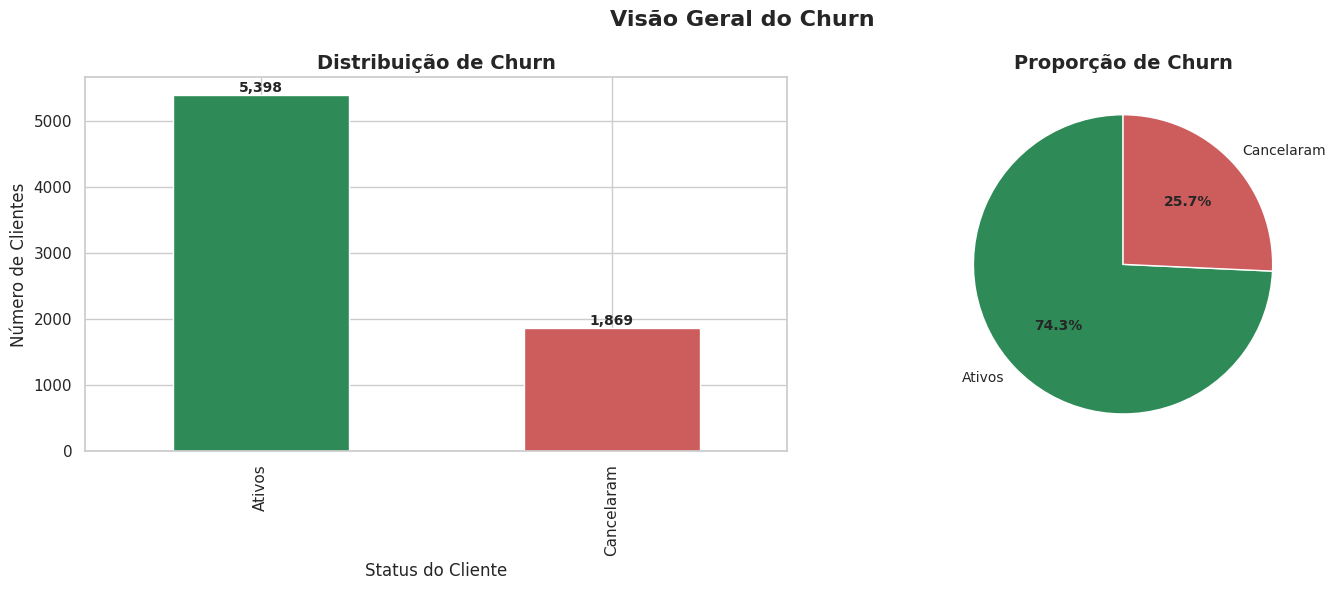

In [160]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
cancel_counts.plot(kind='bar', ax=axes[0], color=['#2E8B57', '#CD5C5C'])
axes[0].set_title('Distribuição de Churn')
axes[0].set_xlabel('Status do Cliente')
axes[0].set_ylabel('Número de Clientes')
axes[0].set_xticklabels(['Ativos', 'Cancelaram'])

# Valores acima das barras
for i, v in enumerate(cancel_counts.values):
    axes[0].text(i, v + 50, f'{v:,}', ha='center', fontweight='bold', fontsize=10)

# Gráfico de pizza
wedges, texts, autotexts = axes[1].pie(
    cancel_counts.values,
    labels=['Ativos', 'Cancelaram'],
    autopct='%1.1f%%',
    colors=['#2E8B57', '#CD5C5C'],
    startangle=90,
    textprops={'fontsize': 10}
)
for autotext in autotexts:
    autotext.set_fontweight('bold')

axes[1].set_title('Proporção de Churn')

plt.suptitle('Visão Geral do Churn', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#2️⃣ Fatores principais de churn

In [162]:
# Variáveis categóricas para analisar
categorical_vars = ['gender', 'seniorcitizen', 'partner', 'dependents',
                   'phoneservice', 'multiplelines', 'internetservice',
                   'onlinesecurity', 'onlinebackup', 'deviceprotection',
                   'techsupport', 'streamingtv', 'streamingmovies',
                   'contract', 'paperlessbilling', 'paymentmethod']

# Função para analisar churn por categoria
def analyze_churn_by_category(df, column):
    if column in ['gender', 'internetservice', 'cont  ract', 'paymentmethod']:
        # Para variáveis categóricas não binárias
        cross_tab = pd.crosstab(df[column], df['churn'])
        churn_rate = pd.crosstab(df[column], df['churn'], normalize='index') * 100
    else:
        # Para variáveis binárias
        cross_tab = pd.crosstab(df[column], df['churn'])
        churn_rate = pd.crosstab(df[column], df['churn'], normalize='index') * 100

    print(f"\n📈 Análise de {column.upper()}:")
    print("Contagem:")
    print(cross_tab)
    print("\nTaxa de Churn (%):")
    print(churn_rate.round(2))

    return cross_tab, churn_rate

KeyError: 'contract'

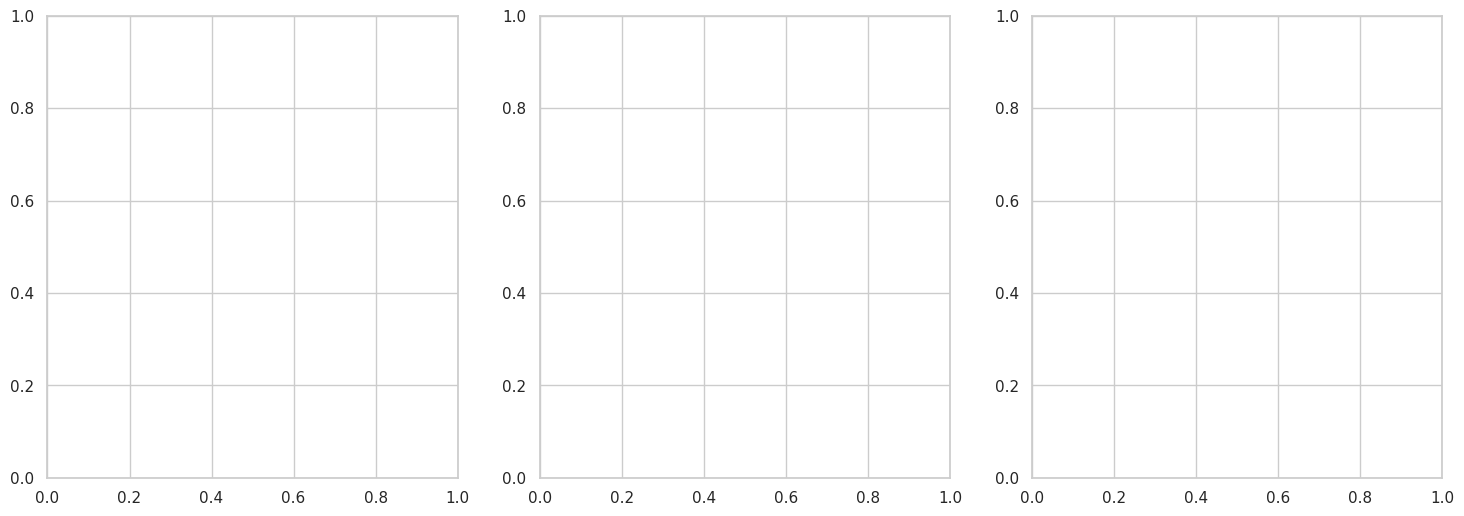

In [163]:
# Analisar as principais variáveis categóricas - APENAS AS MAIS IMPORTANTES
key_vars = ['contract', 'paymentmethod', 'internetservice']  # Reduzido para 3 principais

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Uma linha só

for i, var in enumerate(key_vars):
    cross_tab, churn_rate = analyze_churn_by_category(df, var)

    # Plotar taxa de churn
    churn_rate[1].plot(kind='bar', ax=axes[i], color='#CD5C5C', alpha=0.7)
    axes[i].set_title(f'Taxa de Churn por {var.title()}', fontweight='bold')
    axes[i].set_ylabel('Taxa de Churn (%)')
    axes[i].tick_params(axis='x', rotation=45)

    # Adicionar valores nas barras
    for j, v in enumerate(churn_rate[1].values):
        axes[i].text(j, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Variáveis numéricas para analisar
numeric_vars = ['tenure', 'charges_monthly', 'charges_total']

# Análise estatística por grupo de churn
print("\n📈 Estatísticas por Grupo de Churn:")
for var in numeric_vars:
    print(f"\n{var.upper()}:")
    grouped = df.groupby('churn')[var].describe().round(2)
    print(grouped)

# Visualizações das variáveis numéricas - APENAS BOXPLOTS (mais limpo)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Apenas Boxplots - mais informativos
for i, var in enumerate(numeric_vars):
    df.boxplot(column=var, by='churn', ax=axes[i])
    axes[i].set_title(f'Distribuição de {var.title()} por Churn')
    axes[i].set_xlabel('Churn (0=Ativo, 1=Cancelou)')

plt.tight_layout()
plt.show()

In [ ]:
# Matriz de correlação
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Correlações com churn
churn_correlations = correlation_matrix['churn'].sort_values(key=abs, ascending=False)
print("\n📊 Correlações com Churn (ordenadas por magnitude):")
print(churn_correlations.round(3))

# Heatmap de correlação
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='RdYlBu_r',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Calcular insights automáticos
insights = []

# Taxa geral de churn
churn_rate = df['churn'].mean() * 100
insights.append(f"• Taxa geral de churn: {churn_rate:.2f}%")

# Análise por contrato
contract_churn = df.groupby('contract')['churn'].mean() * 100
worst_contract = contract_churn.idxmax()
insights.append(f"• Pior tipo de contrato: {worst_contract} ({contract_churn[worst_contract]:.2f}% churn)")

# Análise por método de pagamento
payment_churn = df.groupby('paymentmethod')['churn'].mean() * 100
worst_payment = payment_churn.idxmax()
insights.append(f"• Pior método de pagamento: {worst_payment} ({payment_churn[worst_payment]:.2f}% churn)")

# Análise por tenure
low_tenure_churn = df[df['tenure'] <= 12]['churn'].mean() * 100
high_tenure_churn = df[df['tenure'] > 12]['churn'].mean() * 100
insights.append(f"• Churn clientes novos (≤12 meses): {low_tenure_churn:.2f}%")
insights.append(f"• Churn clientes antigos (>12 meses): {high_tenure_churn:.2f}%")

# Análise por valor da conta
high_value_churn = df[df['charges_monthly'] > df['charges_monthly'].quantile(0.75)]['churn'].mean() * 100
low_value_churn = df[df['charges_monthly'] <= df['charges_monthly'].quantile(0.25)]['churn'].mean() * 100
insights.append(f"• Churn clientes alto valor: {high_value_churn:.2f}%")
insights.append(f"• Churn clientes baixo valor: {low_value_churn:.2f}%")


In [ ]:
print("\n🔍 INSIGHTS AUTOMATIZADOS:")
for insight in insights:
    print(insight)